In [1]:
import pickle
import pathlib

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_SEED = 42

In [2]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
print(DATA_DIR)

d:\machine-learning\ames\data


In [3]:
clean_data_path = DATA_DIR / 'processed' / 'ames_clean.pkl'

In [4]:
with open(clean_data_path, 'rb') as file:
    data = pickle.load(file)

In [5]:
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

In [6]:
X.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 2929
Data columns (total 69 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   MS.SubClass      2877 non-null   category
 1   MS.Zoning        2877 non-null   category
 2   Lot.Frontage     2877 non-null   float64 
 3   Lot.Area         2877 non-null   float64 
 4   Lot.Shape        2877 non-null   category
 5   Land.Contour     2877 non-null   category
 6   Lot.Config       2877 non-null   category
 7   Land.Slope       2877 non-null   category
 8   Neighborhood     2877 non-null   category
 9   Bldg.Type        2877 non-null   category
 10  House.Style      2877 non-null   category
 11  Overall.Qual     2877 non-null   category
 12  Overall.Cond     2877 non-null   category
 13  Roof.Style       2877 non-null   category
 14  Mas.Vnr.Type     2877 non-null   category
 15  Mas.Vnr.Area     2877 non-null   float64 
 16  Exter.Qual       2877 non-null   category
 17  

In [7]:
# transform the "category" columns back to normal objects

for col in X.select_dtypes('category'):
    X[col] = X[col].astype(object)

In [8]:
print(X.columns)

Index(['MS.SubClass', 'MS.Zoning', 'Lot.Frontage', 'Lot.Area', 'Lot.Shape',
       'Land.Contour', 'Lot.Config', 'Land.Slope', 'Neighborhood', 'Bldg.Type',
       'House.Style', 'Overall.Qual', 'Overall.Cond', 'Roof.Style',
       'Mas.Vnr.Type', 'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond',
       'Foundation', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure',
       'BsmtFin.Type.1', 'BsmtFin.SF.1', 'BsmtFin.Type.2', 'BsmtFin.SF.2',
       'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating.QC', 'Central.Air',
       'Electrical', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF',
       'Gr.Liv.Area', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath',
       'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual',
       'TotRms.AbvGrd', 'Functional', 'Fireplaces', 'Garage.Type',
       'Garage.Finish', 'Garage.Cars', 'Garage.Area', 'Paved.Drive',
       'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch', 'X3Ssn.Porch',
       'Screen.Porch', 'Pool.Area', 'Fence', 'Misc.Val', 'Mo.Sold', 'Yr.Sold',
   

The average house has 1,505 sq ft of space, the median 1,452 sq ft
The biggest house has 5,642 sq ft of space, the smallest 334 sq ft


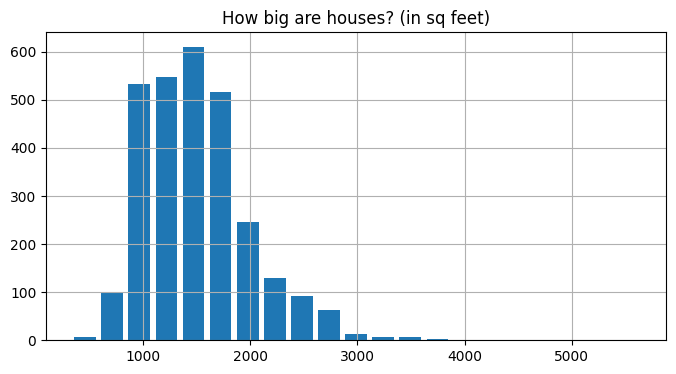

In [9]:
# How big are houses
print('The average house has {:,.0f} sq ft of space, the median {:,.0f} sq ft'.format(
    X['Gr.Liv.Area'].mean(), X['Gr.Liv.Area'].median()))
print('The biggest house has {:,.0f} sq ft of space, the smallest {:,.0f} sq ft'.format(
    X['Gr.Liv.Area'].max(), X['Gr.Liv.Area'].min()))
X['Gr.Liv.Area'].hist(bins=21, rwidth=.8, figsize=(8,4))
plt.title('How big are houses? (in sq feet)')
plt.show()

The average lot is 0.23 acres, the median 0.22 acres
The biggest lot is 4.94 acres, the smallest 0.03 acres


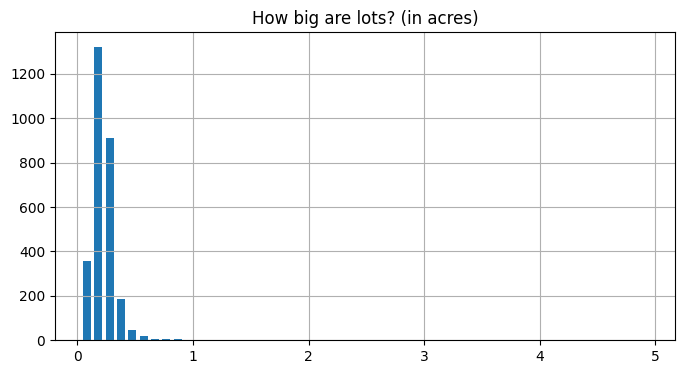

In [10]:
# How big are lots
sqft_to_acres = 43560.
print('The average lot is {:,.2f} acres, the median {:,.2f} acres'.format(
    X['Lot.Area'].mean()/sqft_to_acres, X['Lot.Area'].median()/sqft_to_acres))
print('The biggest lot is {:,.2f} acres, the smallest {:,.2f} acres'.format(
    X['Lot.Area'].max()/sqft_to_acres, X['Lot.Area'].min()/sqft_to_acres))
(X['Lot.Area']/sqft_to_acres).hist(bins=50, rwidth=.7, figsize=(8,4))
plt.title('How big are lots? (in acres)')
plt.show()

Essas duas informações devem ter alta correlação com o preço!

In [11]:
numeric_cols = X.select_dtypes(include=[np.number]).columns
print(numeric_cols)

Index(['Lot.Frontage', 'Lot.Area', 'Mas.Vnr.Area', 'BsmtFin.SF.1',
       'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'X1st.Flr.SF',
       'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Gr.Liv.Area', 'Bsmt.Full.Bath',
       'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr',
       'Kitchen.AbvGr', 'TotRms.AbvGrd', 'Fireplaces', 'Garage.Cars',
       'Garage.Area', 'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch',
       'X3Ssn.Porch', 'Screen.Porch', 'Pool.Area', 'Misc.Val', 'Mo.Sold',
       'Yr.Sold', 'Garage.Age', 'Remod.Age', 'House.Age'],
      dtype='object')


In [12]:
cat_cols = X.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['MS.SubClass', 'MS.Zoning', 'Lot.Shape', 'Land.Contour', 'Lot.Config',
       'Land.Slope', 'Neighborhood', 'Bldg.Type', 'House.Style',
       'Overall.Qual', 'Overall.Cond', 'Roof.Style', 'Mas.Vnr.Type',
       'Exter.Qual', 'Exter.Cond', 'Foundation', 'Bsmt.Qual', 'Bsmt.Cond',
       'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.Type.2', 'Heating.QC',
       'Central.Air', 'Electrical', 'Kitchen.Qual', 'Functional',
       'Garage.Type', 'Garage.Finish', 'Paved.Drive', 'Fence', 'Sale.Type',
       'Sale.Condition', 'Condition', 'Exterior'],
      dtype='object')


d:\machine-learning\ames\env\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
d:\machine-learning\ames\env\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
d:\machine-learning\am

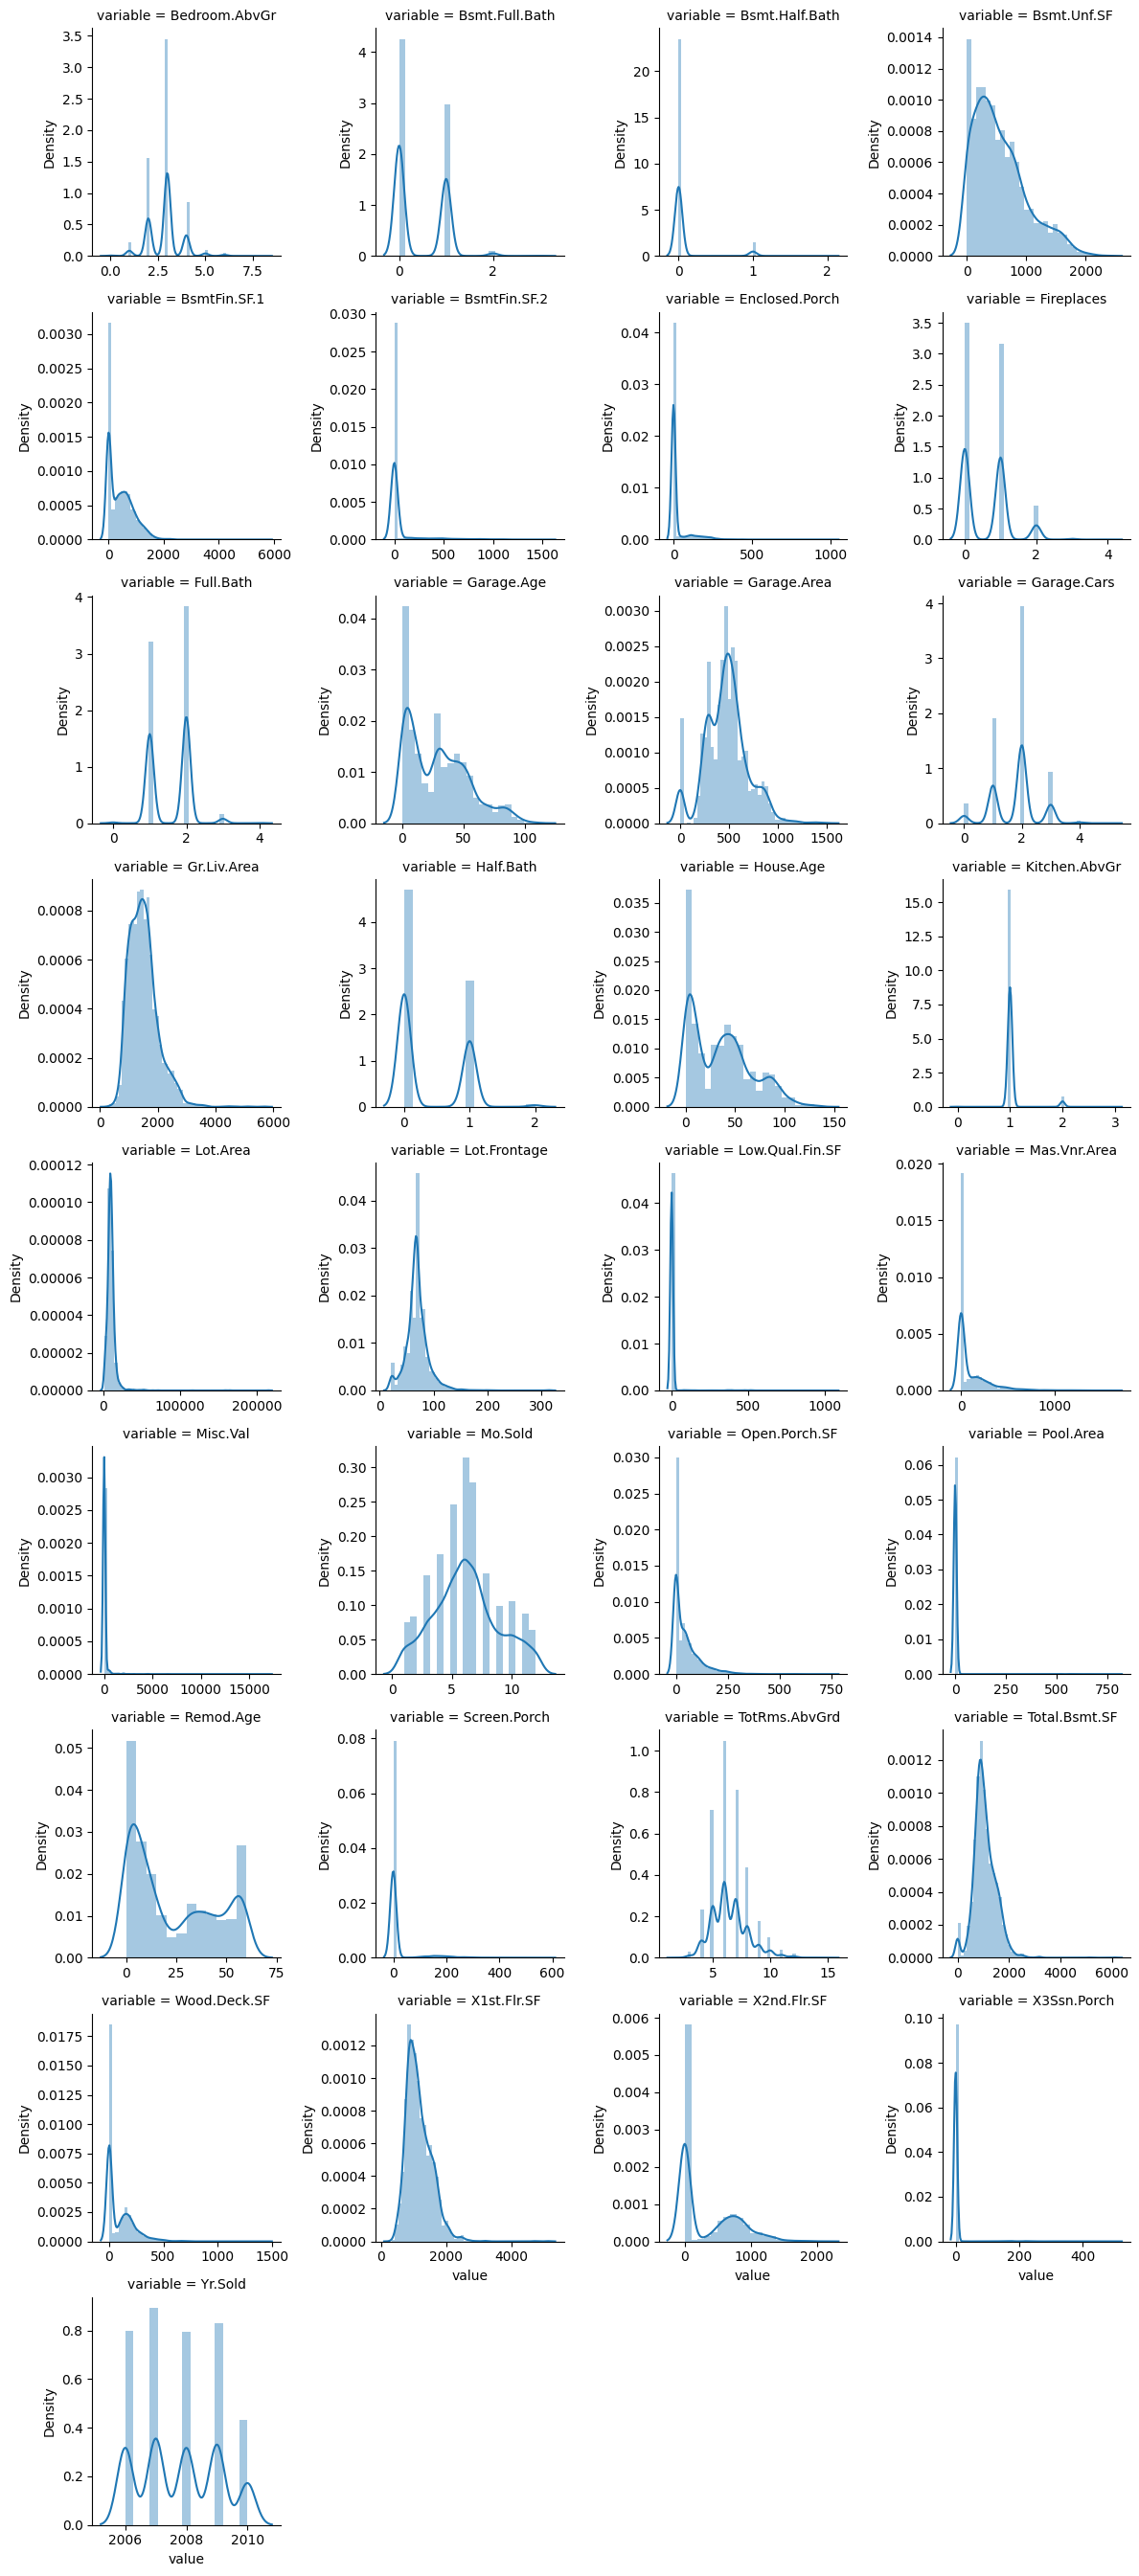

In [13]:
# Grid of distribution plots of all numerical features
f = pd.melt(X, value_vars=sorted(numeric_cols))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

Features que tem um skew e pode ser interessante aplicar log:

Bsmt.Unf.SF, Garage.Area, Gr.Liv.Area, Lot.Area, Lot.Frontage, Total.Bsmt.SF, X1st.Flr.SF

In [14]:
X['MS.SubClass'] = X['MS.SubClass'].apply(lambda x: str(x))
X['Mo.Sold'] = X['Mo.Sold'].apply(lambda x: str(x))
X['Yr.Sold'] = X['Yr.Sold'].apply(lambda x: str(x))

numeric_cols = X.select_dtypes(include=[np.number]).columns
print(numeric_cols)

cat_cols = X.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['Lot.Frontage', 'Lot.Area', 'Mas.Vnr.Area', 'BsmtFin.SF.1',
       'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'X1st.Flr.SF',
       'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Gr.Liv.Area', 'Bsmt.Full.Bath',
       'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr',
       'Kitchen.AbvGr', 'TotRms.AbvGrd', 'Fireplaces', 'Garage.Cars',
       'Garage.Area', 'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch',
       'X3Ssn.Porch', 'Screen.Porch', 'Pool.Area', 'Misc.Val', 'Garage.Age',
       'Remod.Age', 'House.Age'],
      dtype='object')
Index(['MS.SubClass', 'MS.Zoning', 'Lot.Shape', 'Land.Contour', 'Lot.Config',
       'Land.Slope', 'Neighborhood', 'Bldg.Type', 'House.Style',
       'Overall.Qual', 'Overall.Cond', 'Roof.Style', 'Mas.Vnr.Type',
       'Exter.Qual', 'Exter.Cond', 'Foundation', 'Bsmt.Qual', 'Bsmt.Cond',
       'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.Type.2', 'Heating.QC',
       'Central.Air', 'Electrical', 'Kitchen.Qual', 'Functional',
       'Garage.Typ

d:\machine-learning\ames\env\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


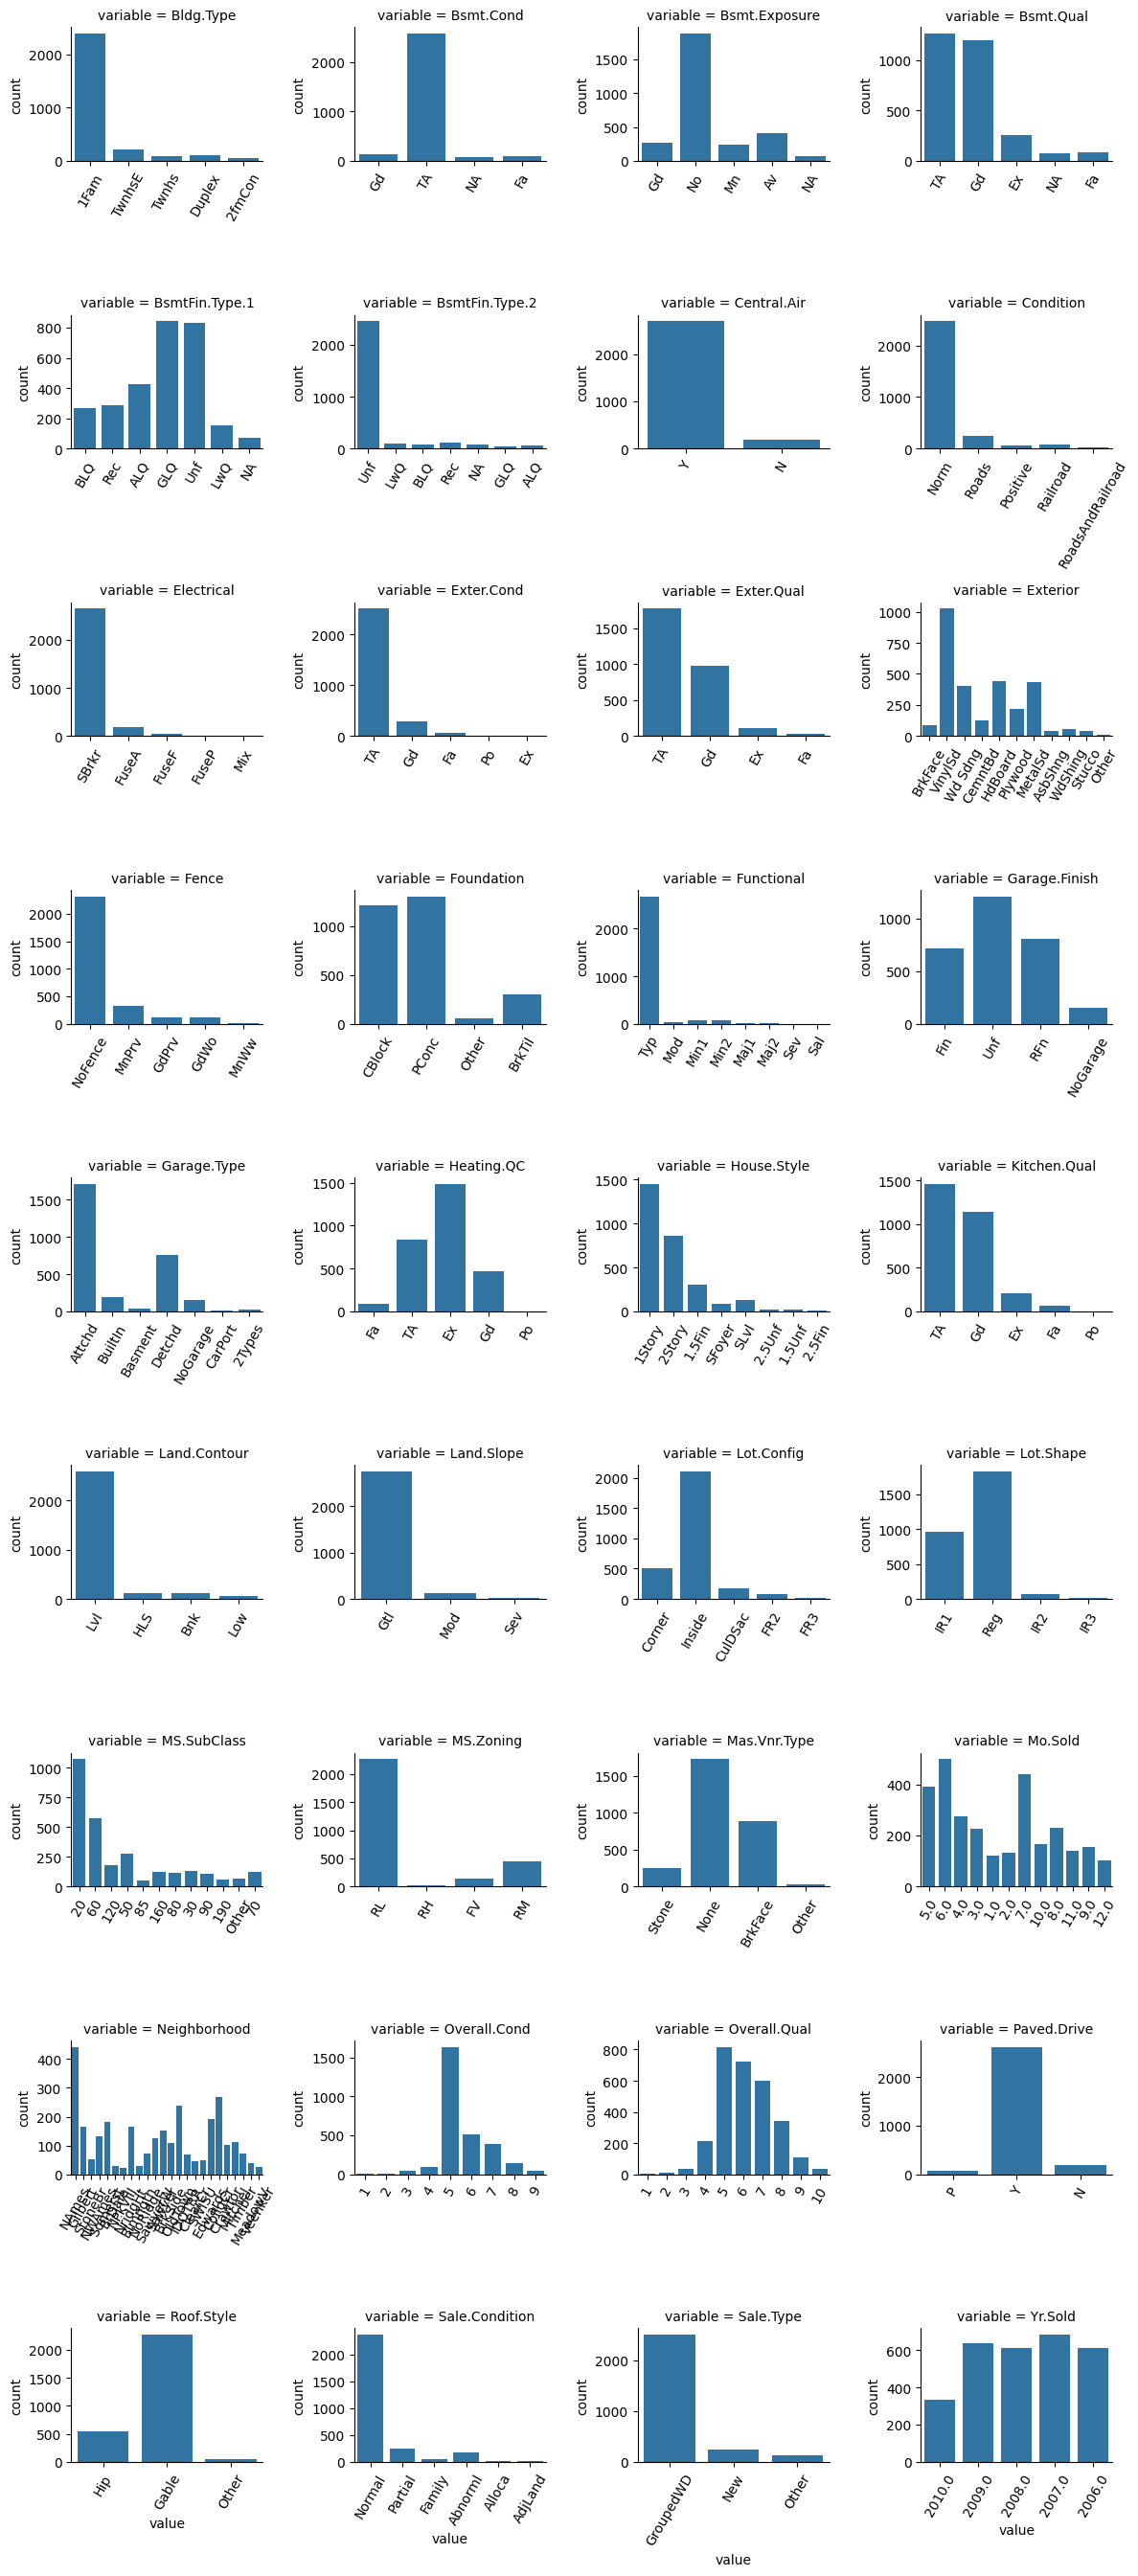

In [15]:
f = pd.melt(X, value_vars=sorted(cat_cols))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [16]:
# Alley, LotShape, LandContour, Utilities, LandSlope, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQuality, GarageCond, PavedDrive, PoolQC

cols_to_change_to_num = ['Lot.Shape', 'Land.Contour', 'Land.Slope', 'Exter.Qual', 'Exter.Cond', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure', 'Heating.QC', 'Kitchen.Qual', 'Functional', 'Garage.Finish', 'Paved.Drive']

In [17]:
X['Lot.Shape'].replace({'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4}, inplace=True)

X['Land.Contour'].replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)

X['Land.Slope'].replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)

X['Exter.Qual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

X['Exter.Cond'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

X['Bsmt.Qual'].replace({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

X['Bsmt.Cond'].replace({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

X['Bsmt.Exposure'].replace({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)

X['Heating.QC'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

X['Kitchen.Qual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

X['Functional'].replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)

X['Garage.Finish'].replace({'NoGarage':0, 'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)

X['Paved.Drive'].replace({'N':1, 'P':2, 'Y':3}, inplace=True)

In [18]:
X[cols_to_change_to_num].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 2929
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Lot.Shape      2877 non-null   int64
 1   Land.Contour   2877 non-null   int64
 2   Land.Slope     2877 non-null   int64
 3   Exter.Qual     2877 non-null   int64
 4   Exter.Cond     2877 non-null   int64
 5   Bsmt.Qual      2877 non-null   int64
 6   Bsmt.Cond      2877 non-null   int64
 7   Bsmt.Exposure  2877 non-null   int64
 8   Heating.QC     2877 non-null   int64
 9   Kitchen.Qual   2877 non-null   int64
 10  Functional     2877 non-null   int64
 11  Garage.Finish  2877 non-null   int64
 12  Paved.Drive    2877 non-null   int64
dtypes: int64(13)
memory usage: 314.7 KB


In [19]:
numeric_cols = X.select_dtypes(include=[np.number]).columns
print(numeric_cols)

cat_cols = X.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['Lot.Frontage', 'Lot.Area', 'Lot.Shape', 'Land.Contour', 'Land.Slope',
       'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond', 'Bsmt.Qual', 'Bsmt.Cond',
       'Bsmt.Exposure', 'BsmtFin.SF.1', 'BsmtFin.SF.2', 'Bsmt.Unf.SF',
       'Total.Bsmt.SF', 'Heating.QC', 'X1st.Flr.SF', 'X2nd.Flr.SF',
       'Low.Qual.Fin.SF', 'Gr.Liv.Area', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath',
       'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr',
       'Kitchen.Qual', 'TotRms.AbvGrd', 'Functional', 'Fireplaces',
       'Garage.Finish', 'Garage.Cars', 'Garage.Area', 'Paved.Drive',
       'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch', 'X3Ssn.Porch',
       'Screen.Porch', 'Pool.Area', 'Misc.Val', 'Garage.Age', 'Remod.Age',
       'House.Age'],
      dtype='object')
Index(['MS.SubClass', 'MS.Zoning', 'Lot.Config', 'Neighborhood', 'Bldg.Type',
       'House.Style', 'Overall.Qual', 'Overall.Cond', 'Roof.Style',
       'Mas.Vnr.Type', 'Foundation', 'BsmtFin.Type.1', 'BsmtFin.Type.2',
       'Central

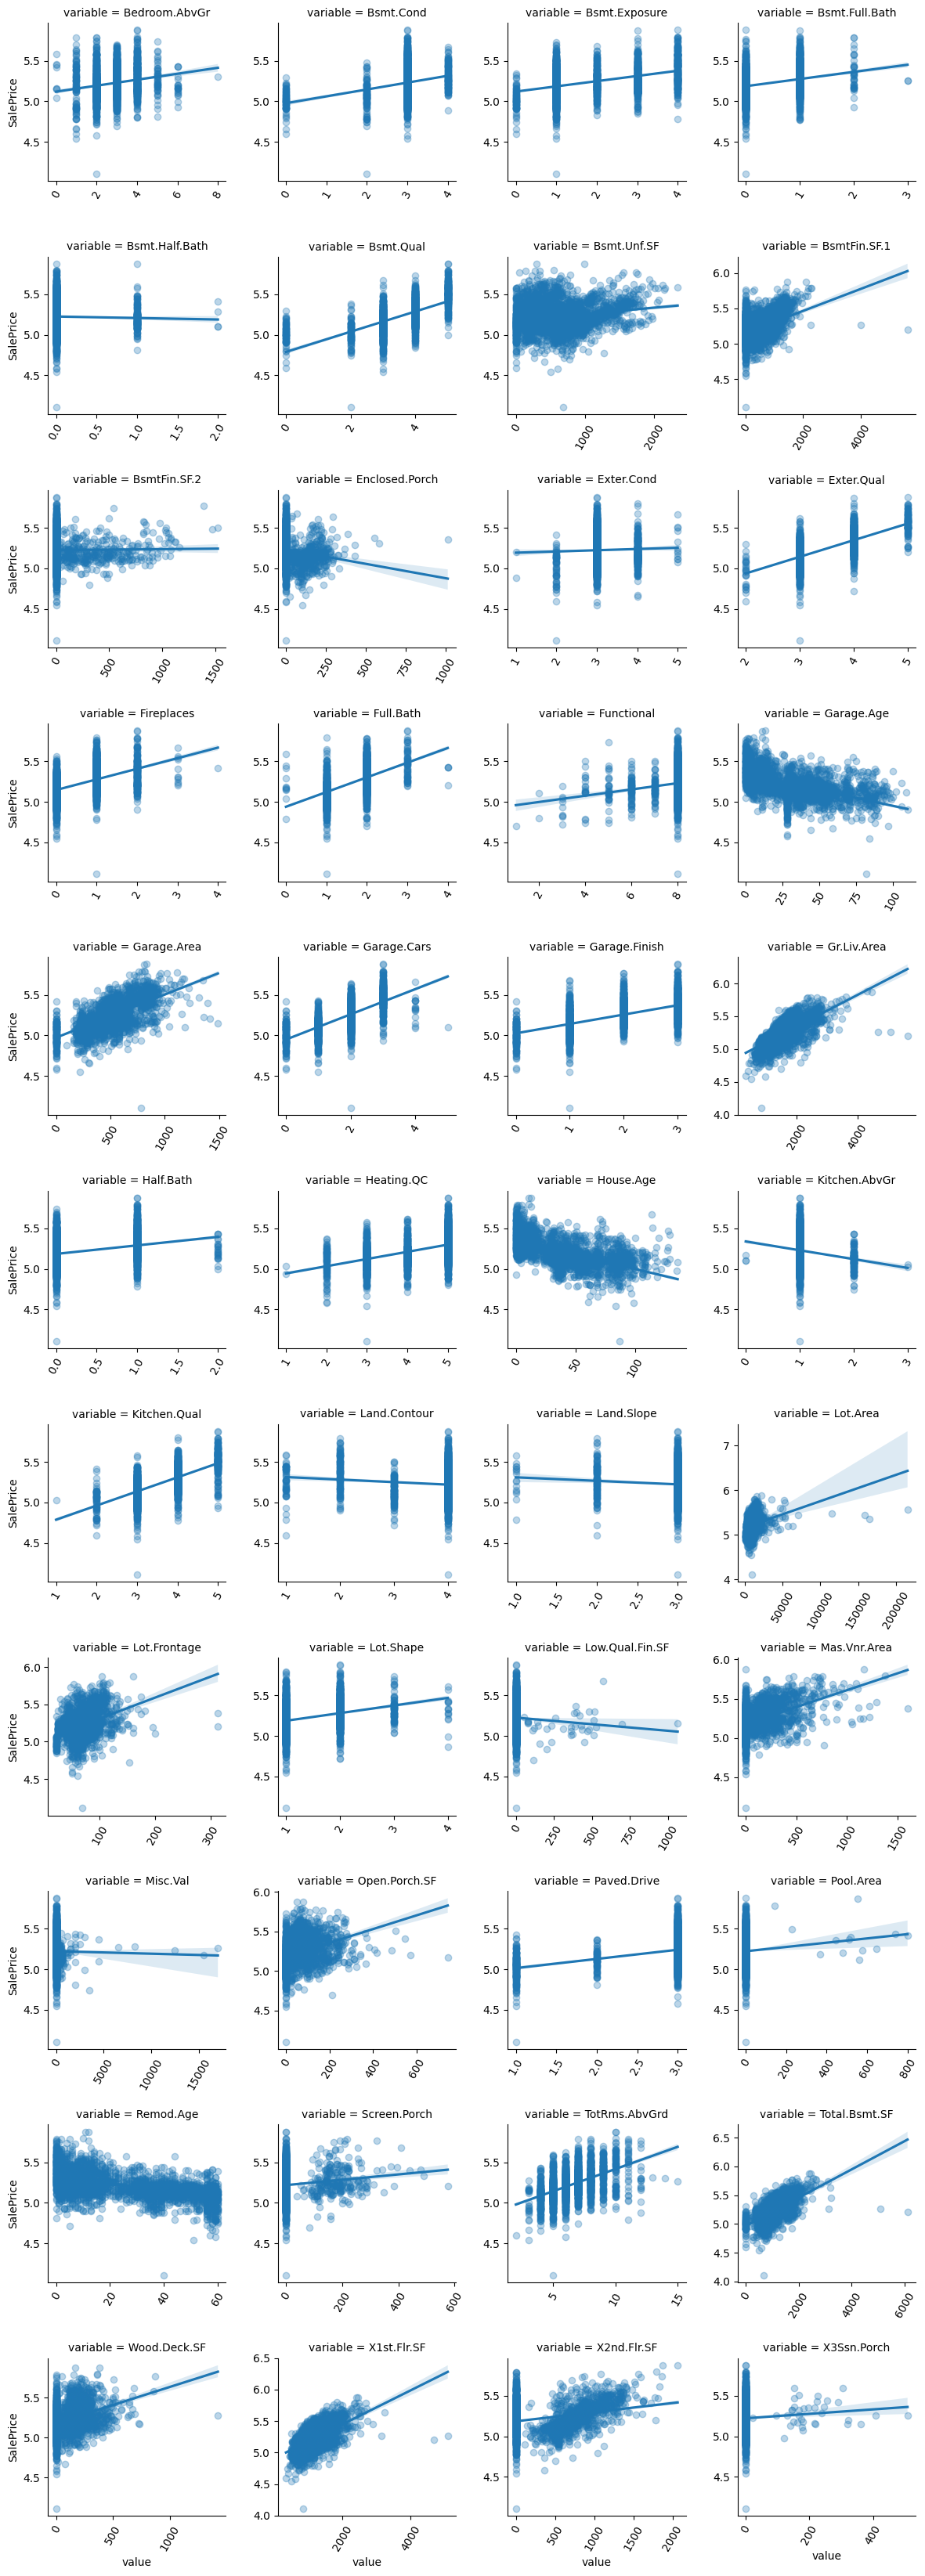

In [20]:
# concat X and y
plot_data = pd.concat([X, y], axis=1) 

f = pd.melt(plot_data, id_vars=['SalePrice'], value_vars=sorted(numeric_cols))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.regplot, 'value', 'SalePrice', scatter_kws={'alpha':0.3})
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

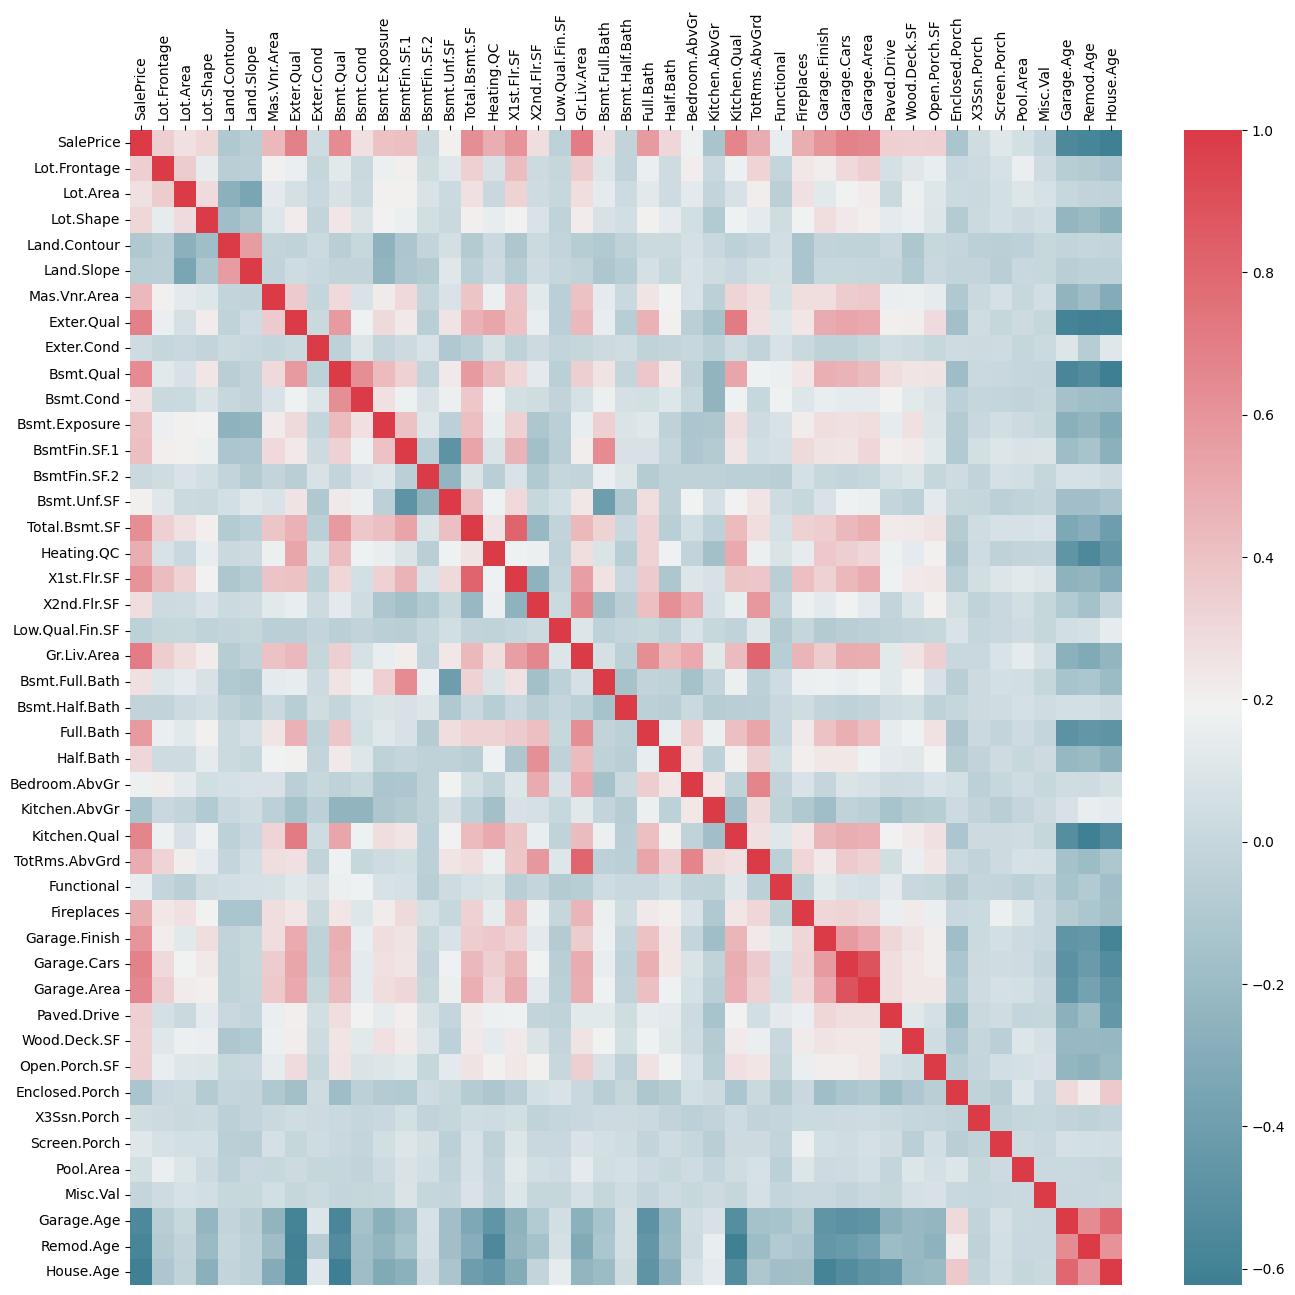

In [21]:
corr = plot_data[['SalePrice', *numeric_cols]].corr()
fig = plt.figure(figsize=(16,15))
ax = fig.add_subplot(111)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.index.values,
           cmap=cmap)
ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

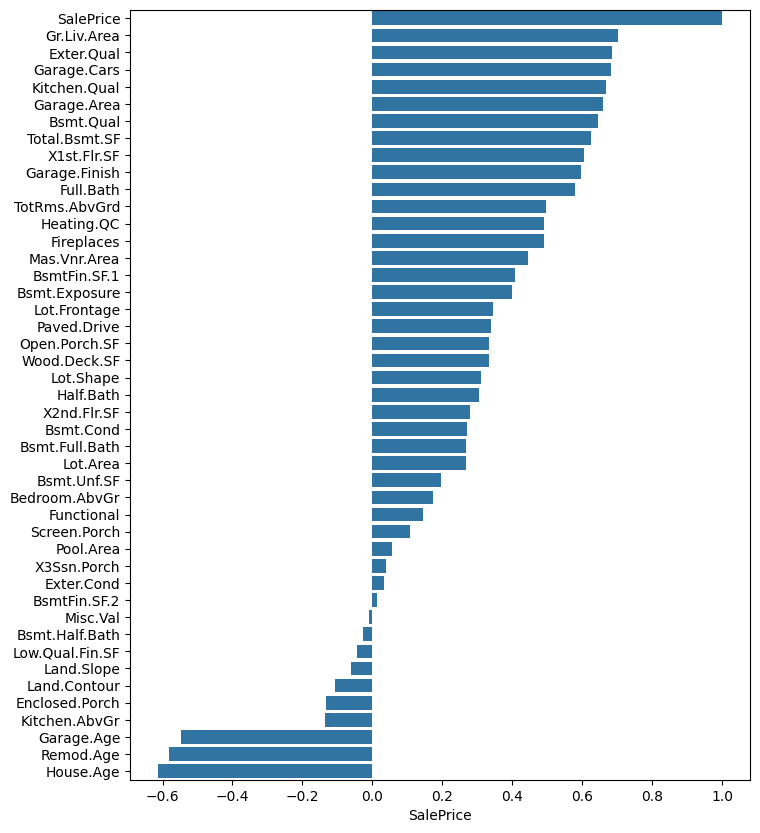

In [22]:
corr = corr.sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot(y=corr.index.values, x=corr['SalePrice'])
plt.show()

d:\machine-learning\ames\env\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


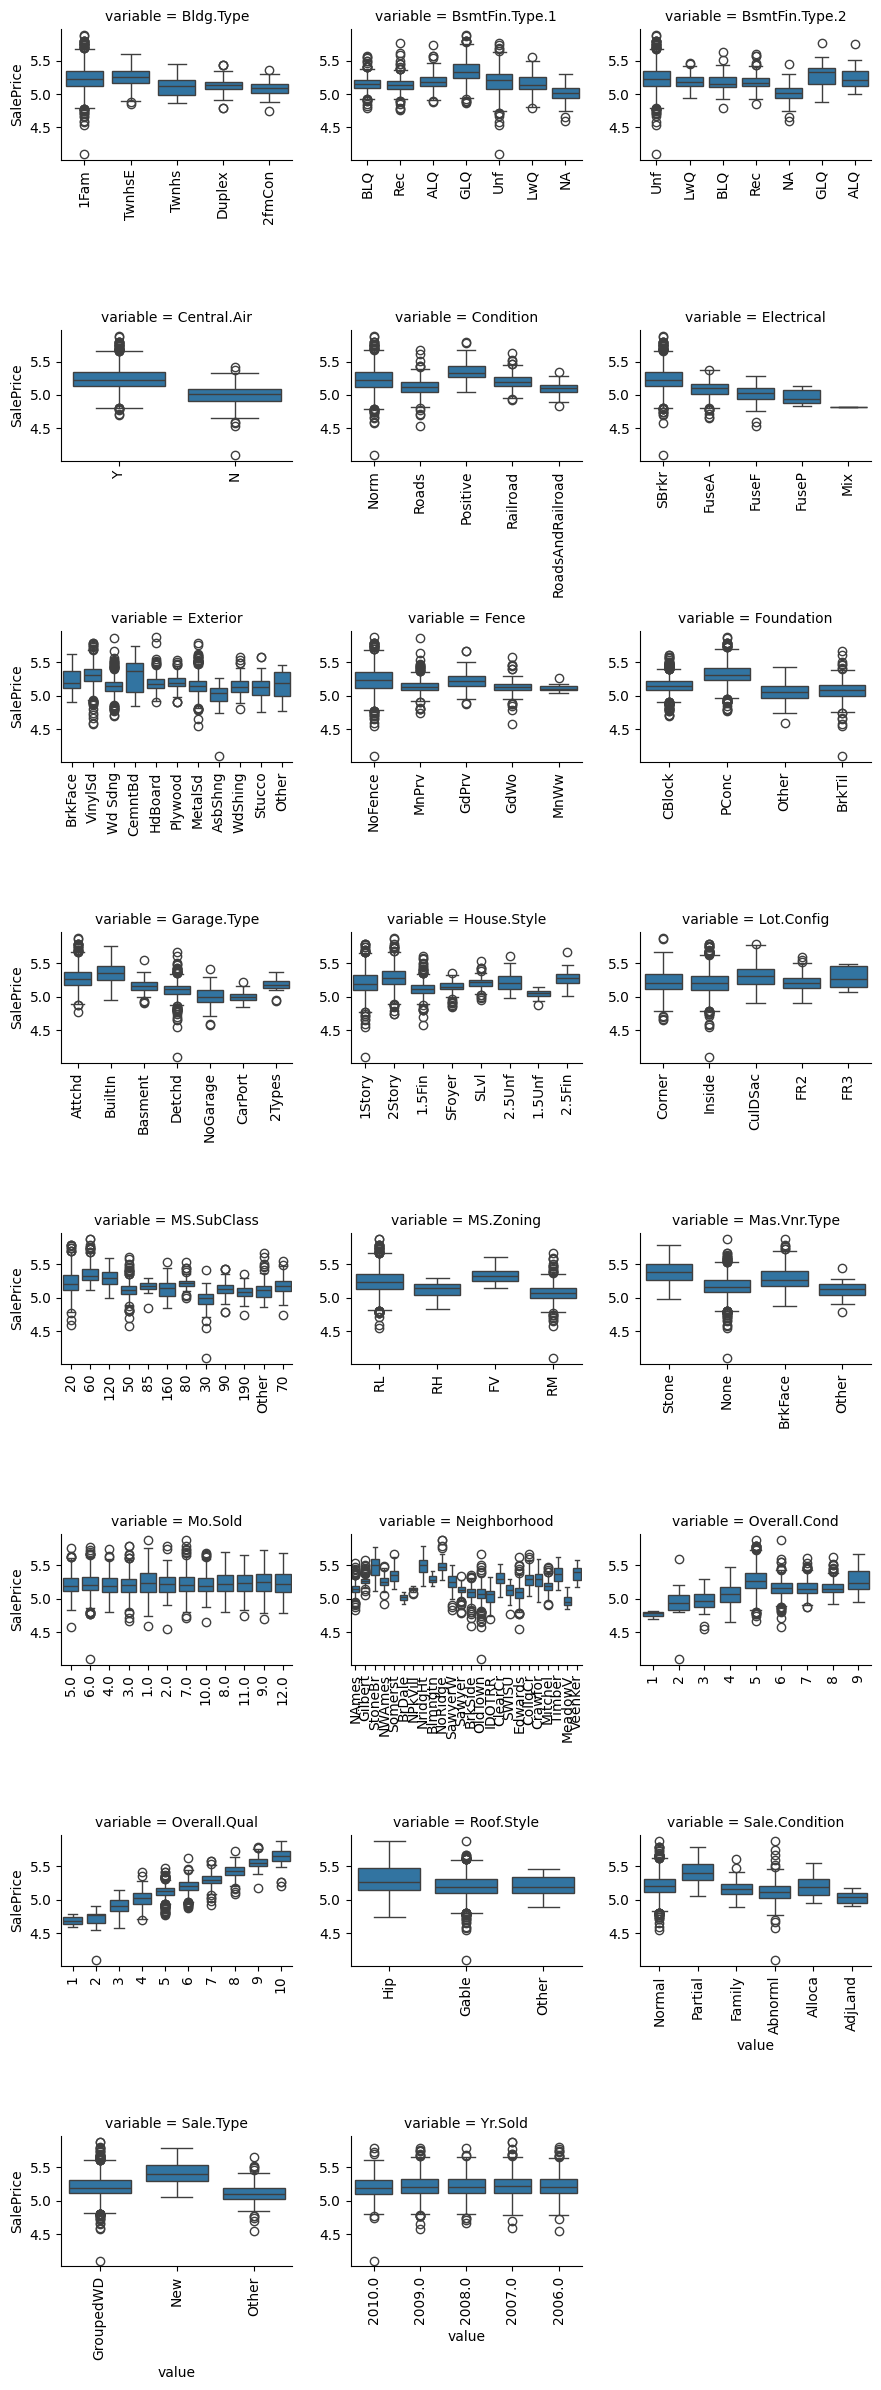

In [23]:
f = pd.melt(plot_data, id_vars=['SalePrice'], value_vars=sorted(cat_cols))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

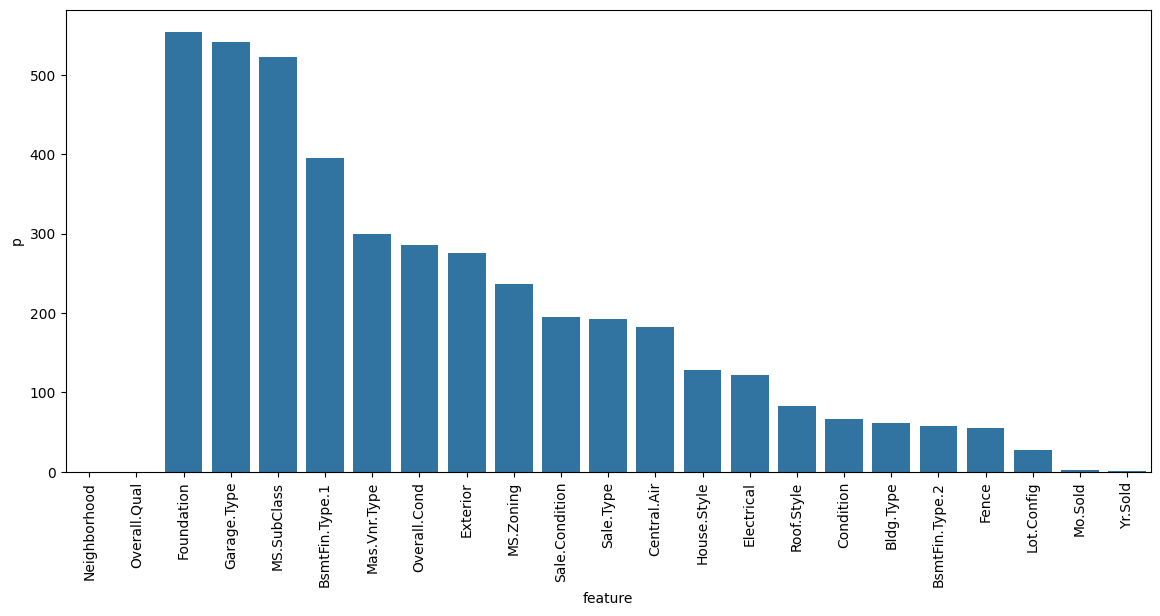

In [24]:
import scipy

anova = {'feature':[], 'f':[], 'p':[]}
for cat in cat_cols:
    group_prices = []
    for group in plot_data[cat].unique():
        group_prices.append(plot_data[plot_data[cat] == group]['SalePrice'].values)
    f, p = scipy.stats.f_oneway(*group_prices)
    anova['feature'].append(cat)
    anova['f'].append(f)
    anova['p'].append(p)
anova = pd.DataFrame(anova)
anova = anova[['feature','f','p']]
anova.sort_values('p', inplace=True)

# Plot
plt.figure(figsize=(14,6))
sns.barplot(x=anova.feature, y=np.log(1./anova['p']))
#sns.barplot(x='feature', y='p', data=anova)
plt.xticks(rotation=90)
plt.show()

In [25]:
filter = (X['Mas.Vnr.Area'] > 1) & (X['Mas.Vnr.Type'] == 'None') 
X[filter]

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Lot.Shape,Land.Contour,Lot.Config,Land.Slope,Neighborhood,Bldg.Type,...,Yr.Sold,Sale.Type,Sale.Condition,Condition,HasShed,HasAlley,Exterior,Garage.Age,Remod.Age,House.Age
363,60,RL,68.0,10762.0,2,4,CulDSac,3,Gilbert,1Fam,...,2009.0,GroupedWD,Normal,Norm,False,False,VinylSd,10.0,10.0,10.0
403,160,RM,24.0,2368.0,1,4,Inside,3,BrDale,TwnhsE,...,2009.0,GroupedWD,Normal,Norm,False,False,HdBoard,39.0,39.0,39.0
441,20,RL,102.0,13514.0,2,4,Corner,3,NridgHt,1Fam,...,2009.0,GroupedWD,Normal,Norm,False,False,VinylSd,1.0,1.0,1.0
2528,60,RL,80.0,10400.0,1,4,Inside,3,NWAmes,1Fam,...,2006.0,GroupedWD,Normal,Norm,False,False,VinylSd,34.0,34.0,34.0


In [26]:
X.shape

(2877, 69)

In [27]:
X.loc[(X['Mas.Vnr.Type'] == 'None') & (X['Mas.Vnr.Area'] > 1), 'Mas.Vnr.Type'] = 'BrkFace' # most common 
X.loc[(X['Mas.Vnr.Type'] == 'None') & (X['Mas.Vnr.Area'] == 1), 'Mas.Vnr.Area'] = 0 # 1 sq ft is basically 0
for vnr_type in X['Mas.Vnr.Type'].unique():
    # so here we set the area equal to the mean of the given veneer type
    X.loc[(X['Mas.Vnr.Type'] == vnr_type) & (X['Mas.Vnr.Area'] == 0), 'Mas.Vnr.Area'] = \
        X[X['Mas.Vnr.Type'] == vnr_type]['Mas.Vnr.Area'].mean() 

In [28]:
X.shape

(2877, 69)

In [29]:
missing_data = X.isnull().sum() / X.shape[0]
print(any(missing_data > 0))

False


In [30]:
plot_data = pd.concat([X, y], axis=1)

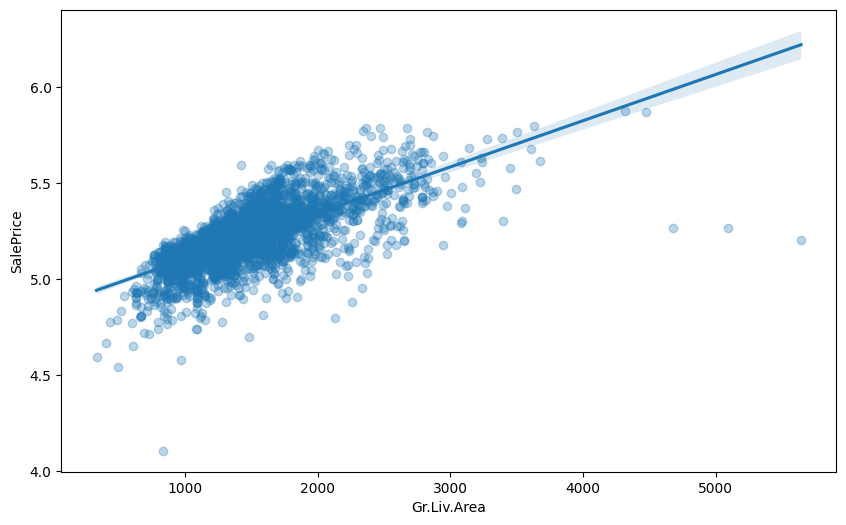

In [31]:
plt.figure(figsize=(10,6))
sns.regplot(x=plot_data['Gr.Liv.Area'], y=plot_data['SalePrice'], scatter_kws={'alpha':0.3})
plt.show()

Parece interessante cortarmos os outliers de +4000ft² de área!

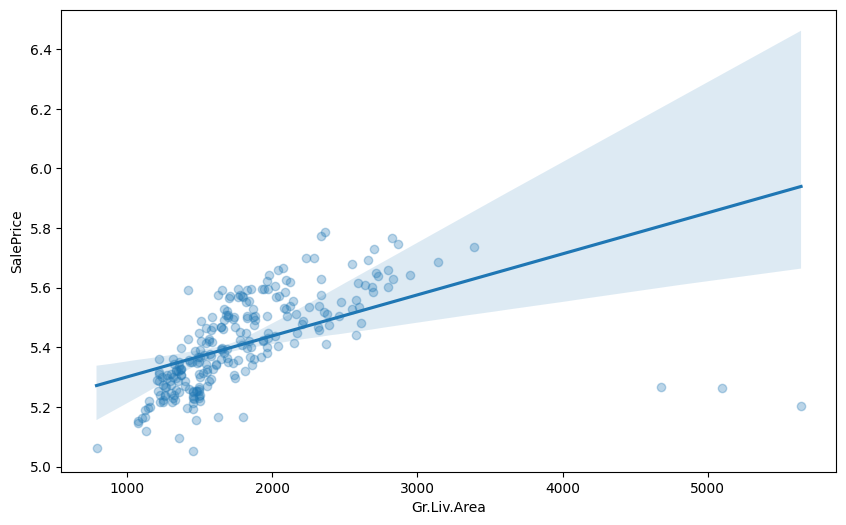

In [32]:
plt.figure(figsize=(10,6))
sns.regplot(x=plot_data[plot_data['Sale.Condition'] == 'Partial']['Gr.Liv.Area'],
            y=plot_data[plot_data['Sale.Condition'] == 'Partial']['SalePrice'], scatter_kws={'alpha':0.3})
plt.show()

In [33]:
idx_to_drop = X[X['Gr.Liv.Area'] >= 4000].index
X.drop(idx_to_drop, inplace=True)
y.drop(idx_to_drop, inplace=True)

In [34]:
X.shape, y.shape

((2872, 69), (2872,))

In [35]:
print([x for x in X.columns if 'Y' in x ])

['Yr.Sold']


In [36]:
# Total Square Footage
X['Total.SF'] = X['Total.Bsmt.SF'] + X['Gr.Liv.Area']
X['Total.Floor.SF'] = X['X1st.Flr.SF'] + X['X2nd.Flr.SF']
X['Total.Porch.SF'] = X['Open.Porch.SF'] + X['Enclosed.Porch'] + \
    X['X3Ssn.Porch'] + X['Screen.Porch']
    
# Total Bathrooms
X['Total.Bathrooms'] = X['Full.Bath'] + .5 * X['Half.Bath'] + \
    X['Bsmt.Full.Bath'] + .5 * X['Bsmt.Half.Bath']

# Booleans
X['Has.Basement'] = X['Total.Bsmt.SF'].apply(lambda x: 1 if x > 0 else 0)
X['Has.Garage'] = X['Garage.Area'].apply(lambda x: 1 if x > 0 else 0)
X['Has.Porch'] = X['Total.Porch.SF'].apply(lambda x: 1 if x > 0 else 0)
X['Has.Pool'] = X['Pool.Area'].apply(lambda x: 1 if x > 0 else 0)
X['Was.Completed'] = (X['Sale.Condition'] != 'Partial').astype(np.int64)


In [37]:

boolean_features = ['Has.Basement', 'Has.Garage', 'Has.Porch', 'Has.Pool', 'Was.Completed']

In [38]:
numeric_cols = X.select_dtypes(include=[np.number]).columns
numeric_cols = [f for f in numeric_cols if f not in boolean_features]
print(numeric_cols)

cat_cols = X.select_dtypes(include=['object']).columns
print(cat_cols)

['Lot.Frontage', 'Lot.Area', 'Lot.Shape', 'Land.Contour', 'Land.Slope', 'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.SF.1', 'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating.QC', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Gr.Liv.Area', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual', 'TotRms.AbvGrd', 'Functional', 'Fireplaces', 'Garage.Finish', 'Garage.Cars', 'Garage.Area', 'Paved.Drive', 'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch', 'X3Ssn.Porch', 'Screen.Porch', 'Pool.Area', 'Misc.Val', 'Garage.Age', 'Remod.Age', 'House.Age', 'Total.SF', 'Total.Floor.SF', 'Total.Porch.SF', 'Total.Bathrooms']
Index(['MS.SubClass', 'MS.Zoning', 'Lot.Config', 'Neighborhood', 'Bldg.Type',
       'House.Style', 'Overall.Qual', 'Overall.Cond', 'Roof.Style',
       'Mas.Vnr.Type', 'Foundation', 'BsmtFin.Type.1', 'BsmtFin.Type.2',
       'Central.Air', 'Electrical', 'Garage.Typ

In [39]:
# log transform any numerical feature with a 
# skew greater than 0.5

skew_limit = 0.5
skew_vals = X[numeric_cols].skew()

high_skew = skew_vals[abs(skew_vals) > skew_limit]
skew_cols = high_skew.index.tolist()

for col in skew_cols:
    X[col] = np.log1p(X[col])
    X[col] = X[col].astype(np.float64)

In [40]:
# Transform Overall Quality and Overall Condition into numeric

X['Overall.Qual'] = X['Overall.Qual'].astype(np.int64)
X['Overall.Cond'] = X['Overall.Cond'].astype(np.int64)

numeric_cols = X.select_dtypes(include=[np.number]).columns
numeric_cols = [f for f in numeric_cols if f not in boolean_features]
print(numeric_cols)

cat_cols = X.select_dtypes(include=['object']).columns
print(cat_cols)

['Lot.Frontage', 'Lot.Area', 'Lot.Shape', 'Land.Contour', 'Land.Slope', 'Overall.Qual', 'Overall.Cond', 'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.SF.1', 'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating.QC', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Gr.Liv.Area', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual', 'TotRms.AbvGrd', 'Functional', 'Fireplaces', 'Garage.Finish', 'Garage.Cars', 'Garage.Area', 'Paved.Drive', 'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch', 'X3Ssn.Porch', 'Screen.Porch', 'Pool.Area', 'Misc.Val', 'Garage.Age', 'Remod.Age', 'House.Age', 'Total.SF', 'Total.Floor.SF', 'Total.Porch.SF', 'Total.Bathrooms']
Index(['MS.SubClass', 'MS.Zoning', 'Lot.Config', 'Neighborhood', 'Bldg.Type',
       'House.Style', 'Roof.Style', 'Mas.Vnr.Type', 'Foundation',
       'BsmtFin.Type.1', 'BsmtFin.Type.2', 'Central.Air', 'Electrical',
       'Garage.Typ

In [41]:
X_model = pd.get_dummies(X, drop_first=True).copy()

In [42]:
print(X_model.shape)

(2872, 180)


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_model, y, test_size=0.2, random_state=RANDOM_SEED)

In [44]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [45]:
scaler = StandardScaler()
X_train.loc[:,numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test.loc[:,numeric_cols] = scaler.transform(X_test[numeric_cols])

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
def rsme(model, X, y):
    cv_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    return np.sqrt(cv_scores)

In [48]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import GradientBoostingRegressor

In [49]:
dummy_cols = [col for col in X_model.columns if col not in numeric_cols]
features_to_try = []
for cat in cat_cols:
    cat_dummies = [c for c in dummy_cols if c.startswith(cat)]
    features_to_try += cat_dummies
    X_train_subset = X_train[numeric_cols + boolean_features + features_to_try]
    X_test_subset = X_test[numeric_cols + boolean_features + features_to_try]
    
    lr = LinearRegression()
    lr.fit(X_train_subset, y_train)
    
    print('Dummy Features: {} | Train RSME: {:.3f} | Test RSME: {:.3f}'.format(
        len(features_to_try), rsme(lr, X_train_subset, y_train).min(), rsme(lr, X_test_subset, y_test).min()))

Dummy Features: 11 | Train RSME: 0.046 | Test RSME: 0.044
Dummy Features: 14 | Train RSME: 0.046 | Test RSME: 0.045
Dummy Features: 18 | Train RSME: 0.046 | Test RSME: 0.045
Dummy Features: 41 | Train RSME: 0.044 | Test RSME: 0.045
Dummy Features: 45 | Train RSME: 0.044 | Test RSME: 0.044
Dummy Features: 52 | Train RSME: 0.044 | Test RSME: 0.044
Dummy Features: 54 | Train RSME: 0.044 | Test RSME: 0.044
Dummy Features: 57 | Train RSME: 0.044 | Test RSME: 0.044
Dummy Features: 60 | Train RSME: 0.044 | Test RSME: 0.044
Dummy Features: 66 | Train RSME: 0.044 | Test RSME: 0.044
Dummy Features: 72 | Train RSME: 0.044 | Test RSME: 0.044
Dummy Features: 73 | Train RSME: 0.043 | Test RSME: 0.044
Dummy Features: 77 | Train RSME: 0.043 | Test RSME: 0.045
Dummy Features: 83 | Train RSME: 0.043 | Test RSME: 0.046
Dummy Features: 87 | Train RSME: 0.043 | Test RSME: 0.046
Dummy Features: 98 | Train RSME: 0.044 | Test RSME: 0.048
Dummy Features: 102 | Train RSME: 0.043 | Test RSME: 0.048
Dummy Feature

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1., 5., 10., 25.], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']

# Hone in
param_grid = {'alpha': [x/100. * alpha for x in range(50, 150, 5)], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']
lasso = lasso.best_estimator_

print('Lasso -> Train RSME: {:.5f} | Test RSME: {:.5f} | alpha: {:.5f}'.format(
    rsme(lasso, X_train, y_train).mean(), rsme(lasso, X_test, y_test).mean(), alpha))

Lasso -> Train RSME: 0.04684 | Test RSME: 0.04927 | alpha: 0.00006


In [51]:
print(X_train.columns)
print(X_train.shape)

Index(['Lot.Frontage', 'Lot.Area', 'Lot.Shape', 'Land.Contour', 'Land.Slope',
       'Overall.Qual', 'Overall.Cond', 'Mas.Vnr.Area', 'Exter.Qual',
       'Exter.Cond',
       ...
       'Exterior_BrkFace', 'Exterior_CemntBd', 'Exterior_HdBoard',
       'Exterior_MetalSd', 'Exterior_Other', 'Exterior_Plywood',
       'Exterior_Stucco', 'Exterior_VinylSd', 'Exterior_Wd Sdng',
       'Exterior_WdShing'],
      dtype='object', length=180)
(2297, 180)


In [52]:
print(X_test.shape)
print(len(X_test.columns))

(575, 180)
180


In [53]:
y_pred = lasso.predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

RMSE

0.04204872504984926

In [55]:
error_percent = 100 * (10**RMSE - 1)
print(f'Average error is {error_percent:.2f}%')

Average error is 10.17%


In [56]:
coefs = pd.DataFrame({'coefs':lasso.coef_,'Positive':lasso.coef_ > 0}, index=X_train.columns)

# get the features that were not dropped

coefs[coefs.coefs != 0].sort_values('coefs', ascending=False)

,coefs,Positive
Gr.Liv.Area,0.049727,True
Sale.Condition_AdjLand,0.048422,True
Sale.Condition_Alloca,0.045673,True
Neighborhood_Crawfor,0.035694,True
Sale.Condition_Normal,0.034143,True
...,...,...
Neighborhood_MeadowV,-0.023866,False
Condition_Roads,-0.025102,False
Condition_RoadsAndRailroad,-0.025818,False
MS.Zoning_RM,-0.030539,False


In [57]:
print('LASSO dropped {} of {} features.'.format(
    sum(coefs.coefs == 0), coefs.shape[0]))

LASSO dropped 39 of 180 features.


# Trying Roubst Scaler + Lasso and CatBoost

In [60]:
X_v6 = X_model.copy()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_v6, y, test_size=0.2, random_state=RANDOM_SEED)

In [62]:
# use robust scaler

scaler = RobustScaler()
X_train.loc[:,numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test.loc[:,numeric_cols] = scaler.transform(X_test[numeric_cols])

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1., 5., 10., 25.], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']

# Hone in
param_grid = {'alpha': [x/100. * alpha for x in range(50, 150, 5)], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']
lasso = lasso.best_estimator_

print('Lasso -> Train RSME: {:.5f} | Test RSME: {:.5f} | alpha: {:.5f}'.format(
    rsme(lasso, X_train, y_train).mean(), rsme(lasso, X_test, y_test).mean(), alpha))

Lasso -> Train RSME: 0.04682 | Test RSME: 0.04911 | alpha: 0.00006


In [64]:
y_pred = lasso.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

RMSE

0.04202947487019866

In [65]:
error_percent = 100 * (10**RMSE - 1)
print(f'Average error is {error_percent:.2f}%')

Average error is 10.16%


## CatBoost

In [66]:
from catboost import CatBoostRegressor

In [67]:
catreg = CatBoostRegressor(random_seed=RANDOM_SEED, verbose=False)

catreg.fit(X_train, y_train)

In [68]:
y_pred = catreg.predict(X_test)

In [69]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

RMSE

0.043202824591358456

In [70]:
error_percent = 100 * (10**RMSE - 1)
print(f'Average error is {error_percent:.2f}%')

Average error is 10.46%


## Random Forest

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
param_grid = {
    'n_estimators': [100, 200, 300],          # Número de árvores na floresta
    'max_features': ['auto', 'sqrt'],         # Número máximo de features a considerar em cada split
    'max_depth': [None, 10, 20, 30],           # Profundidade máxima da árvore
    'min_samples_split': [2, 5, 10],            # Número mínimo de amostras necessárias para splitar um nó
    'min_samples_leaf': [1, 2, 4]               # Número mínimo de amostras necessárias em uma folha
}

rf_model = GridSearchCV(RandomForestRegressor(random_state=RANDOM_SEED), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=1)

rf_model.fit(X_train, y_train)

rf_model.best_params_

rf_model_best = rf_model.best_estimator_

print('Random Forest -> Train RSME: {:.5f} | Test RSME: {:.5f} | num_estim: {:.5f}'.format(
    rsme(rf_model, X_train, y_train).mean(), rsme(rf_model, X_test, y_test).mean(), len(rf_model.estimators_)))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [77]:

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

RMSE

0.051993635671673304

In [78]:
error_percent = 100 * (10**RMSE - 1)
print(f'Average error is {error_percent:.2f}%')

Average error is 12.72%


# Dropping the Features dropped by Lasso

In [109]:
X_v2 = X_model.drop(coefs[coefs.coefs == 0].index, axis=1)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_model, y, test_size=0.2, random_state=RANDOM_SEED)

In [111]:
# scale

scaler = StandardScaler()
X_train.loc[:,numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test.loc[:,numeric_cols] = scaler.transform(X_test[numeric_cols])

## GradientBoosting

In [60]:
gb_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=2, random_state=RANDOM_SEED)

gb_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=1000, random_state=42)

In [61]:
y_pred = gb_model.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

RMSE

0.051137423766149805

In [62]:
error_percent = 100 * (10**RMSE - 1)
print(f'Average error is {error_percent:.2f}%')

Average error is 12.50%


## RandomForest

In [114]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=RANDOM_SEED)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

RMSE

0.05499074905930762

In [115]:
error_percent = 100 * (10**RMSE - 1)
print(f'Average error is {error_percent:.2f}%')

Average error is 13.50%


## RandomForest w/ GridSearch

In [117]:
#param_grid = {'n_estimators': [100, 200, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

param_grid = {
    'n_estimators': [100, 200, 300],          # Número de árvores na floresta
    'max_features': ['auto', 'sqrt'],         # Número máximo de features a considerar em cada split
    'max_depth': [None, 10, 20, 30],           # Profundidade máxima da árvore
    'min_samples_split': [2, 5, 10],            # Número mínimo de amostras necessárias para splitar um nó
    'min_samples_leaf': [1, 2, 4]               # Número mínimo de amostras necessárias em uma folha
}

rf_model = GridSearchCV(RandomForestRegressor(random_state=RANDOM_SEED), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=1)

rf_model.fit(X_train, y_train)

rf_model.best_params_

rf_model_best = rf_model.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

In [ ]:
y_pred = rf_model_best.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

RMSE

In [ ]:
error_percent = 100 * (10**RMSE - 1)
print(f'Average error is {error_percent:.2f}%')

## Lasso again

In [63]:
lasso.get_params()

{'alpha': 6.500000000000001e-05,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 50000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

# Testing PCA

In [64]:
X_v3 = X_model.copy()

In [65]:
#import PCA
from sklearn.decomposition import PCA

#instantiate PCA
pca = PCA(n_components=0.9, random_state=RANDOM_SEED)

#fit PCA
pca.fit(X_v3)

#transform data
X_pca = pca.transform(X_v3)

In [66]:
X_pca.shape

(2872, 2)

In [67]:
scaler = StandardScaler()
X_pca = scaler.fit_transform(X_pca)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=RANDOM_SEED)

In [69]:
lasso_v3 = Lasso(alpha=alpha, max_iter=50000)
lasso_v3.fit(X_train, y_train)

y_pred = lasso_v3.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

RMSE

0.10681544674911482

In [70]:
error_percent = 100 * (10**RMSE - 1)
print(f'Average error is {error_percent:.2f}%')

Average error is 27.88%


# Drop features used to create new features

In [100]:
X_v5 = X_model.copy()

In [101]:
feats_to_drop = ['Total.Bsmt.SF', 'Gr.Liv.Area', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Open.Porch.SF', 'Enclosed.Porch', 'X3Ssn.Porch', 'Screen.Porch', 'Full.Bath', 'Half.Bath','Bsmt.Full.Bath','Bsmt.Half.Bath']

In [102]:
X_v5.drop(feats_to_drop, axis=1, inplace=True)

X_v5 = X_v5.dropna(axis=1, how='all')


In [103]:
X_v5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2872 entries, 0 to 2929
Columns: 183 entries, Lot.Frontage to Exterior_WdShing
dtypes: bool(142), float64(34), int64(7)
memory usage: 1.3 MB


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_v5, y, test_size=0.2, random_state=RANDOM_SEED)

In [105]:
new_num_cols = [col for col in numeric_cols if col not in feats_to_drop]

In [106]:
scaler = StandardScaler()
X_train.loc[:,new_num_cols] = scaler.fit_transform(X_train[new_num_cols])
X_test.loc[:,new_num_cols] = scaler.transform(X_test[new_num_cols])

In [107]:
lasso_v5 = Lasso(alpha=alpha, max_iter=50000)

lasso_v5.fit(X_train, y_train)

y_pred = lasso_v5.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

RMSE

0.044541229575407924

In [108]:
error_percent = 100 * (10**RMSE - 1)
print(f'Average error is {error_percent:.2f}%')

Average error is 10.80%


# Testing Polynomial Features

In [260]:
X_v4 = X_model.copy()

In [261]:
X_v4.shape

(2872, 195)

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X_v4, y, test_size=0.2, random_state=RANDOM_SEED)

In [263]:
scaler = StandardScaler()
X_train.loc[:,numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test.loc[:,numeric_cols] = scaler.transform(X_test[numeric_cols])

In [264]:
## apply polynomial features

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

## applies only to the numerical features

X_train = poly.fit_transform(X_train[numeric_cols], y_train)
X_test = poly.transform(X_test[numeric_cols], y_test)

In [265]:
X_train.shape

(2297, 1431)

In [266]:
lasso_v3 = Lasso(alpha=alpha, max_iter=50000)
lasso_v3.fit(X_train, y_train)

y_pred = lasso_v3.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

RMSE

In [ ]:
error_percent = 100 * (10**RMSE - 1)
print(f'Average error is {error_percent:.2f}%')

Todo

* GridSearch pra todo mundo  
* Novos modelos

Testes a se fazer:

* Dropar as que ele usou pra fazer novas features  
* Usar feature importance para dropar features  
* Ver quais o Lasso dropped  
* PolynomialFeatures  
* PCA